Grupo 03

1.   Amanda Audy
2.   Carina Dourado
3.   Ingridy Silva
4.   Larissa Sayuri Santos
5.   Meyrele Torres
6.   Victor Farias


Esse código faz a manipulação de dados inicial do trabalho.

1. Filtramos dados dos 10 times que escolhemos e a partir de 2018
2. Deixamos os dados em formato que junta mandante e visitante nas mesmas colunas. Logo, cada jogo fica representado 2 vezes: uma linha para o time mandante e outra para o visitante.
3. Criamos variáveis para derrota, empate e vitória **de cada partida**, por time (lógico!) 

In [ ]:
# Bibliotecas
import pandas as pd               # manipulação de dados
import numpy as np                # manipulação de dados

# LEITURA DE DADOS

In [ ]:
# "Parametros"
# Dados de 10 times
times = ['Grêmio', 'Internacional', 'Flamengo', 'Cruzeiro', 'Atlético-MG', 
         'Corinthians', 'Palmeiras', 'São Paulo', 'Botafogo', 'Sport Recife']

In [ ]:
# Fazendo a conexao com o google drive (aula Mineracao)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lendo os dados
path = "XXX"
arq = "brasileirao_serie_a.csv"

bras = pd.read_csv(path + arq)

In [ ]:
# Renomeando coluna do ano
bras = bras.rename({'ano_campeonato': 'ano'}, axis = 'columns')

# Dados a partir de 2018
bras = bras.query('ano >= 2018')

# Criar uma nova variável: Total de gols
bras = bras.assign(total_gols = bras.gols_man + bras.gols_vis)

bras.head()

,ano,data,horario,rodada,estadio,arbitro,publico,publico_max,time_man,time_vis,tecnico_man,tecnico_vis,colocacao_man,colocacao_vis,valor_equipe_titular_man,valor_equipe_titular_vis,idade_media_titular_man,idade_media_titular_vis,gols_man,gols_vis,gols_1_tempo_man,gols_1_tempo_vis,escanteios_man,escanteios_vis,faltas_man,faltas_vis,chutes_bola_parada_man,chutes_bola_parada_vis,defesas_man,defesas_vis,impedimentos_man,impedimentos_vis,chutes_man,chutes_vis,chutes_fora_man,chutes_fora_vis,total_gols
5890,2018,2018-04-14,09:00,1,Estádio Governador Magalhães Pinto,Rodolpho Toski Marques,19285.0,57483.0,Cruzeiro,Grêmio,Mano Menezes,Renato Gaúcho,15.0,7.0,28000000.0,40000000.0,31.4,29.2,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5891,2018,2018-04-15,12:01,1,Estádio Manoel Barradas,Wagner Reway,13142.0,35632.0,EC Vitória,Flamengo,Vágner Mancini,Maurício Barbieri,10.0,9.0,8080000.0,55000000.0,26.3,28.4,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
5892,2018,2018-04-15,02:00,1,Estádio Municipal Paulo Machado de Carvalho,Rodrigo D,15513.0,37730.0,Santos FC,Ceará SC,Jair Ventura,Marcelo Chamusca,3.0,18.0,26900000.0,7430000.0,25.2,28.3,2.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5893,2018,2018-04-15,04:00,1,Estádio Raimundo Sampaio,Savio Pereira Sampaio,8662.0,25000.0,América-MG,Sport Recife,Enderson Moreira,Nelsinho Baptista,2.0,19.0,7300000.0,9100000.0,27.6,26.6,3.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5894,2018,2018-04-15,09:00,1,Neo Química Arena,Anderson Daronco,28777.0,49205.0,Corinthians,Fluminense,Fábio Carille,Abel Braga,5.0,14.0,29300000.0,8750000.0,27.7,25.0,2.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


# SEPARANDO BASES PARA MANDANTE E VISITANTE

In [ ]:
# Filtrando apenas os 10 times de interesse
# Mandante
bras_man = bras[bras['time_man'].isin(times)] 
# bras_man = bras_hist[bras_hist['time_man'].isin(times)]

# Visitante
bras_vis = bras[bras['time_vis'].isin(times)] 
# bras_vis = bras_hist[bras_hist['time_vis'].isin(times)]

bras_vis.head()

,ano,data,horario,rodada,estadio,arbitro,publico,publico_max,time_man,time_vis,tecnico_man,tecnico_vis,colocacao_man,colocacao_vis,valor_equipe_titular_man,valor_equipe_titular_vis,idade_media_titular_man,idade_media_titular_vis,gols_man,gols_vis,gols_1_tempo_man,gols_1_tempo_vis,escanteios_man,escanteios_vis,faltas_man,faltas_vis,chutes_bola_parada_man,chutes_bola_parada_vis,defesas_man,defesas_vis,impedimentos_man,impedimentos_vis,chutes_man,chutes_vis,chutes_fora_man,chutes_fora_vis,total_gols
5890,2018,2018-04-14,09:00,1,Estádio Governador Magalhães Pinto,Rodolpho Toski Marques,19285.0,57483.0,Cruzeiro,Grêmio,Mano Menezes,Renato Gaúcho,15.0,7.0,28000000.0,40000000.0,31.4,29.2,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5891,2018,2018-04-15,12:01,1,Estádio Manoel Barradas,Wagner Reway,13142.0,35632.0,EC Vitória,Flamengo,Vágner Mancini,Maurício Barbieri,10.0,9.0,8080000.0,55000000.0,26.3,28.4,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
5893,2018,2018-04-15,04:00,1,Estádio Raimundo Sampaio,Savio Pereira Sampaio,8662.0,25000.0,América-MG,Sport Recife,Enderson Moreira,Nelsinho Baptista,2.0,19.0,7300000.0,9100000.0,27.6,26.6,3.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5896,2018,2018-04-15,09:00,1,Estádio São Januário,André Luiz de Freitas Castro,7197.0,24584.0,Vasco da Gama,Atlético-MG,Zé Ricardo,Thiago Larghi,6.0,13.0,12950000.0,21850000.0,28.5,28.6,2.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5898,2018,2018-04-17,01:00,1,Estádio Olímpico Nilton Santos,Ricardo Marques Ribeiro,8033.0,46931.0,Botafogo,Palmeiras,Alberto Valentim,Roger Machado,12.0,11.0,11600000.0,36350000.0,25.6,28.9,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [ ]:
# Selecionando colunas
man = bras_man[['ano', 'data', 'rodada', 'time_man', 
                'tecnico_man', 'colocacao_man', 'gols_man', 
                'total_gols'
                ]]
vis = bras_vis[['ano', 'data', 'rodada', 'time_vis', 
                'tecnico_vis', 'colocacao_vis', 'gols_vis', 
                'total_gols'
                ]]

In [ ]:
# Renomeando colunas
man = man.rename({'time_man': 'time', 'tecnico_man': 'tecnico', 'colocacao_man': 'colocacao', 'gols_man': 'gols', 'chutes_man':'chutes'}, axis = 'columns')
vis = vis.rename({'time_vis': 'time', 'tecnico_vis': 'tecnico', 'colocacao_vis': 'colocacao', 'gols_vis': 'gols', 'chutes_vis':'chutes'}, axis = 'columns')

In [ ]:
# Criar uma nova variável: gols_outro_time
man = man.assign(gols_outro_time = man.total_gols - man.gols)
vis = vis.assign(gols_outro_time = vis.total_gols - vis.gols)

# Criar uma nova variável: dif_gols
man = man.assign(dif_gols = man.gols - man.gols_outro_time)
vis = vis.assign(dif_gols = vis.gols - vis.gols_outro_time)
man.head()

,ano,data,rodada,time,tecnico,colocacao,gols,total_gols,gols_outro_time,dif_gols
5890,2018,2018-04-14,1,Cruzeiro,Mano Menezes,15.0,0.0,1.0,1.0,-1.0
5894,2018,2018-04-15,1,Corinthians,Fábio Carille,5.0,2.0,3.0,1.0,1.0
5895,2018,2018-04-15,1,Internacional,Odair Hellmann,4.0,2.0,2.0,0.0,2.0
5898,2018,2018-04-17,1,Botafogo,Alberto Valentim,12.0,1.0,2.0,1.0,0.0
5899,2018,2018-04-17,1,São Paulo,Diego Aguirre,8.0,1.0,1.0,0.0,1.0


In [ ]:
# Funções para criar colunas que dizem se ocorreu derrota, empate ou vitoria

def ocorreu_derrota(value):
    if value < 0:
      return 1
    else: 
      return 0  


def ocorreu_empate(value):
    if value == 0:
      return 1
    else: 
      return 0     


def ocorreu_vitoria(value):
    if value > 0:
      return 1
    else: 
      return 0    

In [ ]:
# Criar novas variáveis do resultado final do jogo para MANDANTE
man['derrota'] = man.dif_gols.apply(ocorreu_derrota)
man['empate'] = man.dif_gols.apply(ocorreu_empate)
man['vitoria'] = man.dif_gols.apply(ocorreu_vitoria)

#man.query('dif_gols > 0')

In [ ]:
# Criar novas variáveis do resultado final do jogo para VISITANTE
vis['derrota'] = vis.dif_gols.apply(ocorreu_derrota)
vis['empate'] = vis.dif_gols.apply(ocorreu_empate)
vis['vitoria'] = vis.dif_gols.apply(ocorreu_vitoria)

#vis.tail()

# JUNTANDO BASES DE MANDANTE E VISITANTE

In [ ]:
# Juntando Mandante com Visitante
dados = pd.concat([man, vis]).reset_index()

dados

,index,ano,data,rodada,time,tecnico,colocacao,gols,total_gols,gols_outro_time,dif_gols,derrota,empate,vitoria
0,5890,2018,2018-04-14,1,Cruzeiro,Mano Menezes,15.0,0.0,1.0,1.0,-1.0,1,0,0
1,5894,2018,2018-04-15,1,Corinthians,Fábio Carille,5.0,2.0,3.0,1.0,1.0,0,0,1
2,5895,2018,2018-04-15,1,Internacional,Odair Hellmann,4.0,2.0,2.0,0.0,2.0,0,0,1
3,5898,2018,2018-04-17,1,Botafogo,Alberto Valentim,12.0,1.0,2.0,1.0,0.0,0,1,0
4,5899,2018,2018-04-17,1,São Paulo,Diego Aguirre,8.0,1.0,1.0,0.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,7023,2020,2021-02-26,38,Grêmio,Renato Gaúcho,6.0,0.0,1.0,1.0,-1.0,1,0,0
1060,7024,2020,2021-02-26,38,Palmeiras,Abel Ferreira,7.0,0.0,2.0,2.0,-2.0,1,0,0
1061,7025,2020,2021-02-26,38,Corinthians,Vágner Mancini,10.0,0.0,0.0,0.0,0.0,0,1,0
1062,7027,2020,2021-02-26,38,Sport Recife,Jair Ventura,14.0,0.0,2.0,2.0,-2.0,1,0,0


In [ ]:
dados.to_csv('dados_semiprocessados.csv', index = False)

from google.colab import files
files.download('dados_semiprocessados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

14 entradas como NA:

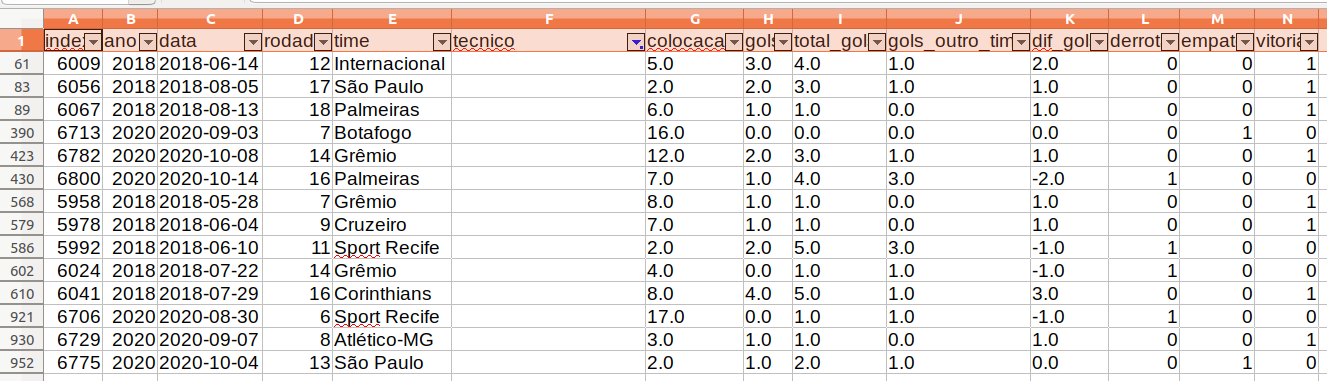